In [78]:
import pandas as pd
elon = pd.read_csv("Elon_musk.csv",encoding = "ISO-8859-1")

In [79]:
elon.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [80]:
elon.isnull().sum()

Unnamed: 0    0
Text          0
dtype: int64

In [81]:
df= elon.drop(["Unnamed: 0"], axis=1)

In [82]:
df

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [83]:
import re #regular expression
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

In [84]:
df['Text'] = df.Text.apply(clean)
df.Text

0                                            im an alien
1       idaacarmack ray tracing on cyberpunk with hdr ...
2                        joerogan spotify great interview
3                                  doge is underestimated
4       teslacn congratulations tesla china for amazin...
                              ...                        
1994    flcnhvy true it sounds so surreal but the nega...
1995    ppathole make sure to read ur terms amp condit...
1996                    teslagong ppathole samwise gamgee
1997                   ppathole altho dumb and dumber is 
1998                              progress update august 
Name: Text, Length: 1999, dtype: object

In [85]:
#Word frequency
freq = pd.Series(' '.join(df['Text']).split()).value_counts()[:20] # for top 20
freq

the               486
to                400
a                 355
is                355
of                315
spacex            239
in                219
amp               218
for               194
tesla             166
will              165
be                157
erdayastronaut    142
this              140
it                137
we                135
on                129
rt                127
that              127
but               126
dtype: int64

In [86]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [87]:
#removing stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [88]:
df

,Text
0,im alien
1,idaacarmack ray tracing cyberpunk hdr nextleve...
2,joerogan spotify great interview
3,doge underestimated
4,teslacn congratulations tesla china amazing ex...
...,...
1994,flcnhvy true sounds surreal negative propagand...
1995,ppathole make sure read ur terms amp condition...
1996,teslagong ppathole samwise gamgee
1997,ppathole altho dumb dumber


In [89]:
freq_new = pd.Series(' '.join(df['Text']).split()).value_counts()[:20] # for top 20
freq_new

spacex             239
amp                218
tesla              166
erdayastronaut     142
rt                 127
ppathole           123
flcnhvy            114
yes                 86
great               76
teslaownerssv       73
wholemarsblog       68
teslarati           59
its                56
nasaspaceflight     55
haha                55
good                51
launch              49
sure                43
yeah                41
cleantechnica       40
dtype: int64

In [90]:
# count vectoriser tells the frequency of a word.
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer(min_df = 1, max_df= 100)
X = vectorizer.fit_transform(df["Text"])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
#print(word_freq_df.sort('occurrences',ascending = False).head())

In [91]:
word_freq_df.head(30)

,term,occurrences,frequency
0,aber,1,0.000082
1,able,6,0.000490
2,abo,1,0.000082
3,aboard,1,0.000082
4,abort,3,0.000245
5,absence,1,0.000082
6,absolute,1,0.000082
7,absolutely,15,0.001225
8,absorb,1,0.000082
9,absorption,1,0.000082


In [92]:
#TFIDF - Term frequency inverse Document Frequencyt
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(elon["Text"])
names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()
data = pd.DataFrame(denselist, columns = names_features)

In [93]:
data

,000,0001f1e9,0001f1ea,0001f3b6,0001f440,0001f44c,0001f44d,0001f495,0001f4af,0001f525,0001f5a4,0001f600,0001f609,0001f622,0001f680,0001f923,0432,0435,043b,043e,10,100,11,1b,20,200d,2020,2192,21st,25,263a,2660,2665,26a1,28,28delayslater,30,300,330,39a,...,week,weeks,welcome,went,westcoastbill,whatsupfranks,wholemarsblog,wide,wikipedia,wild,william_m_brown,wind,wintonark,wise,won,wonderofscience,word,work,worked,working,works,world,worldandscience,worth,wow,wr4nygov,wrong,xdreamcoding,xiang_aw,ya,yahoofinance,yeah,year,years,yes,yesterday,yourfavgas,yup,zero,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.354775,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.845719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
#sentiment analysis
import nltk
afinn =pd.read_csv("Afinn.csv",sep =',',encoding='latin-1',engine="python")
#affin is a file having both postive words and negtive words with predefined score

In [95]:
afinn.head(10)

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
5,abductions,-2
6,abhor,-3
7,abhorred,-3
8,abhorrent,-3
9,abhors,-3


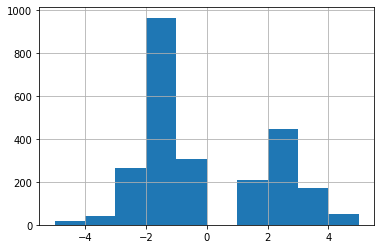

In [96]:
afinn["value"].hist()

In [97]:
!pip install afinn

In [98]:
from afinn import Afinn

In [99]:
afinn=Afinn(language='en')#setting language to english

In [100]:
df["afinn_score"]= df["Text"].apply(afinn.score)#to calculate the sentiment total score of each documents in text.

In [101]:
df #made a separate column for scores in dataframe.

,Text,afinn_score
0,im alien,0.0
1,idaacarmack ray tracing cyberpunk hdr nextleve...,0.0
2,joerogan spotify great interview,3.0
3,doge underestimated,-1.0
4,teslacn congratulations tesla china amazing ex...,6.0
...,...,...
1994,flcnhvy true sounds surreal negative propagand...,-1.0
1995,ppathole make sure read ur terms amp condition...,1.0
1996,teslagong ppathole samwise gamgee,0.0
1997,ppathole altho dumb dumber,-3.0


In [102]:
df["afinn_score"].describe()

count    1999.000000
mean        0.818909
std         1.872894
min        -7.000000
25%         0.000000
50%         0.000000
75%         2.000000
max        12.000000
Name: afinn_score, dtype: float64

In [103]:
#for word counting to further generalize afinn_score
def word_count(text_string):
    '''Calculate the number of words in a string'''
    return len(text_string.split())

In [104]:
df['word_count'] = df['Text'].apply(word_count)

In [105]:
df

,Text,afinn_score,word_count
0,im alien,0.0,2
1,idaacarmack ray tracing cyberpunk hdr nextleve...,0.0,7
2,joerogan spotify great interview,3.0,4
3,doge underestimated,-1.0,2
4,teslacn congratulations tesla china amazing ex...,6.0,10
...,...,...,...
1994,flcnhvy true sounds surreal negative propagand...,-1.0,11
1995,ppathole make sure read ur terms amp condition...,1.0,10
1996,teslagong ppathole samwise gamgee,0.0,4
1997,ppathole altho dumb dumber,-3.0,4


In [106]:
df.describe()

,afinn_score,word_count
count,1999.000000,1999.000000
mean,0.818909,6.708854
std,1.872894,4.067040
min,-7.000000,0.000000
25%,0.000000,3.000000
50%,0.000000,6.000000
75%,2.000000,10.000000
max,12.000000,20.000000


In [107]:
df['afinn_adjusted_score'] = df['afinn_score'] / df['word_count'] * 100

In [108]:
df

,Text,afinn_score,word_count,afinn_adjusted_score
0,im alien,0.0,2,0.000000
1,idaacarmack ray tracing cyberpunk hdr nextleve...,0.0,7,0.000000
2,joerogan spotify great interview,3.0,4,75.000000
3,doge underestimated,-1.0,2,-50.000000
4,teslacn congratulations tesla china amazing ex...,6.0,10,60.000000
...,...,...,...,...
1994,flcnhvy true sounds surreal negative propagand...,-1.0,11,-9.090909
1995,ppathole make sure read ur terms amp condition...,1.0,10,10.000000
1996,teslagong ppathole samwise gamgee,0.0,4,0.000000
1997,ppathole altho dumb dumber,-3.0,4,-75.000000


In [109]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


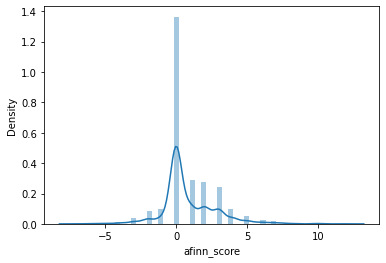

In [110]:
sns.distplot(df["afinn_score"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


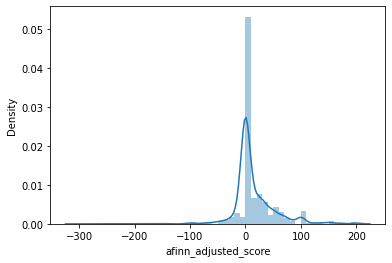

In [111]:
sns.distplot(df["afinn_adjusted_score"])

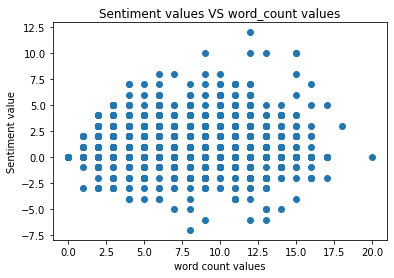

In [112]:
import matplotlib.pyplot as plt
#scatter plot
figsize=(10,10)
plt.xlabel("word count values")
plt.ylabel("Sentiment value")
plt.title("Sentiment values VS word_count values")
plt.scatter(y='afinn_score', x='word_count',data=df)